In [12]:
import os
import copy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from IForest import read_data_samples,Isolation_Forest

In [2]:
X_train = read_data_samples()

In [3]:
params = { 'X': X_train,
               'n_features': X_train.shape[1],
               'max_samples': 256,
               'contamination': 0.1,
               'max_features': 1.0,
               'bootstrap': False,
               'random_state': 0,
               'n_estimators': 100,
               'n_samples': X_train.shape[0]
               }

In [4]:
IForest = Isolation_Forest(**params)

In [5]:
IForest.fit(X_train)

In [6]:
clusters, outlier_index, outliers = IForest.predict(X_train)

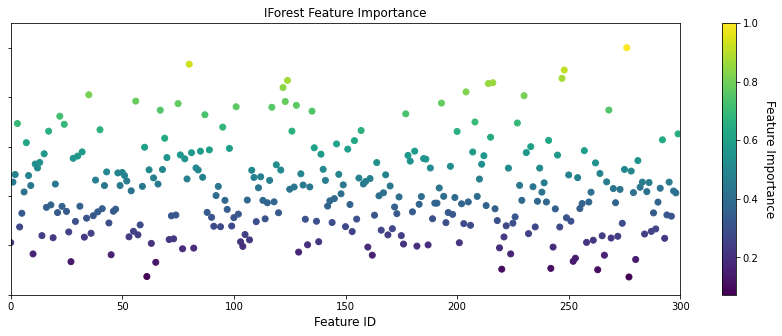

In [9]:
features = IForest.get_feature_importance(plot=True)

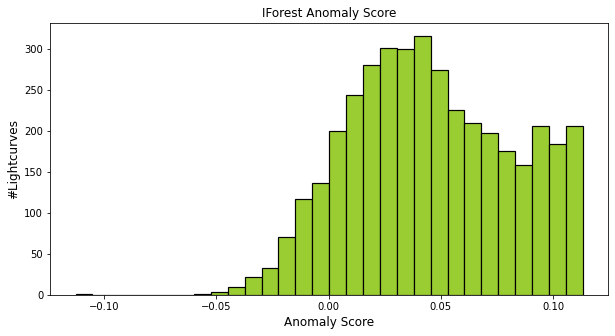

In [10]:
anomaly_score = IForest.get_anomaly_score(X_train, plot=True)

In [13]:
anomaly_matrix=copy.deepcopy(anomaly_score)

In [16]:
n_outliers = 200
outlier_ids = np.arange(X_train.shape[0])
outlier_score = np.sort(anomaly_matrix)[:n_outliers]
outliers = outlier_ids[np.argsort(anomaly_matrix)][:n_outliers]

In [17]:
print(outlier_score[:10])

[-0.11279204 -0.05519117 -0.05185985 -0.0517382  -0.04994777 -0.04501213
 -0.04368935 -0.04346559 -0.04312392 -0.04307406]


In [18]:
print(outliers[:10])

[2736  564 2639 1249 3821 2741 1104 1785 1140 1497]
